## Exoplanet Classification
### Practical I - Machine Learning

#### Mírian Francielle

The goal of this practical is to practice the concepts studied during the module and to acquire experience in the use of some of the main classification methods, model evaluation and interpretation and presentation of experimental results. A comparison of multiple classification methods based on different principles in a binary classification problem regarding exoplanet candidates.

Task: Comparing six classification methods
- Naive Bayes
- Decision Tree
- SVM
- k-NN
- Random Forest
- Gradient Tree Boosting

In [91]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style

from IPython.display import display
from matplotlib import colors

from sklearn import svm
from sklearn import metrics
from sklearn import ensemble
from sklearn import neighbors
from sklearn import feature_selection
from sklearn.model_selection import KFold

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve
from sklearn.model_selection import train_test_split

In [92]:
#Input file path 
INPUT_FILEPATH = "koi_data.csv"
TARGET = "koi_disposition"
N_FEATURES = 41

#K-Folds cross-validator
N_FOLDS = 5

# Validation size
VAL_SIZE = 0.2

In [93]:
df = pd.read_csv(INPUT_FILEPATH)
df = df.drop(["kepoi_name"], axis=1)

print("lines: {}".format(df.shape[0]))
print("rows: {}".format(df.shape[1]))
print("Missing data: {}".format(df.isnull().sum().sum()))

# list features
features = list(df.columns)
features.remove(TARGET)
print("Target: {}".format(TARGET))

print("\n InputFile:")
with pd.option_context("max_columns", 6):
    display(df.head(10))

lines: 5202
rows: 42
Missing data: 0
Target: koi_disposition

 InputFile:


,koi_disposition,koi_period,koi_impact,...,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,CONFIRMED,9.48804,0.146,...,0.080,0.310,0.320
1,CONFIRMED,54.41838,0.586,...,0.490,0.120,0.500
2,FALSE POSITIVE,1.73695,1.276,...,-0.257,0.099,0.276
3,CONFIRMED,2.52559,0.701,...,0.070,0.020,0.070
4,FALSE POSITIVE,7.36179,1.169,...,-4.537,7.713,8.948
5,CONFIRMED,16.06865,0.052,...,0.005,0.030,0.031
6,CONFIRMED,2.47061,0.818,...,0.015,-0.270,0.270
7,CONFIRMED,3.52250,0.631,...,-0.028,0.176,0.178
8,CONFIRMED,3.70921,0.051,...,0.160,-0.130,0.210
9,FALSE POSITIVE,11.52145,2.483,...,0.147,0.037,0.151


In [94]:
#All features
print("Features:", features)

Features: ['koi_period', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_ror', 'koi_srho', 'koi_prad', 'koi_sma', 'koi_incl', 'koi_teq', 'koi_insol', 'koi_dor', 'koi_max_sngle_ev', 'koi_max_mult_ev', 'koi_model_snr', 'koi_steff', 'koi_slogg', 'koi_smet', 'koi_srad', 'koi_smass', 'koi_kepmag', 'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag', 'koi_kmag', 'koi_fwm_stat_sig', 'koi_fwm_sra', 'koi_fwm_sdec', 'koi_fwm_srao', 'koi_fwm_sdeco', 'koi_fwm_prao', 'koi_fwm_pdeco', 'koi_dicco_mra', 'koi_dicco_mdec', 'koi_dicco_msky', 'koi_dikco_mra', 'koi_dikco_mdec', 'koi_dikco_msky']


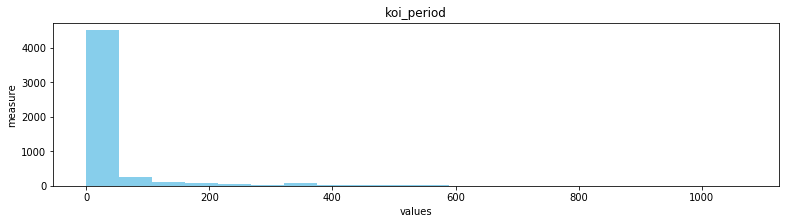

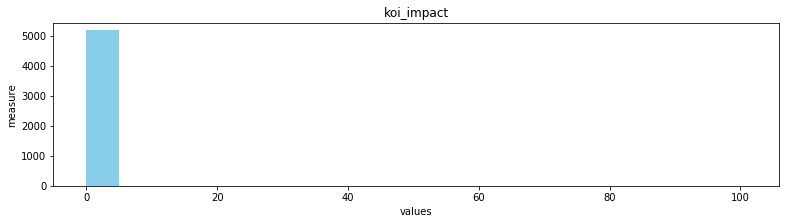

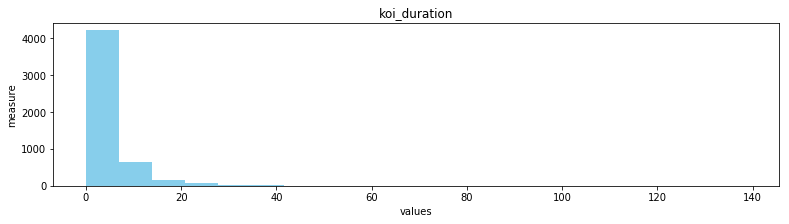

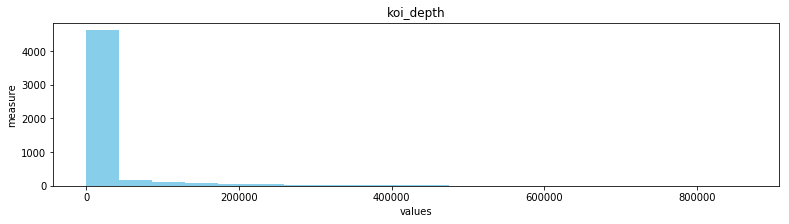

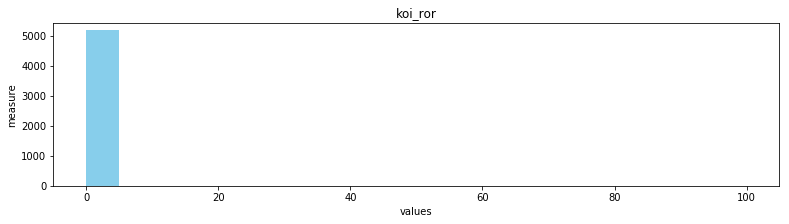

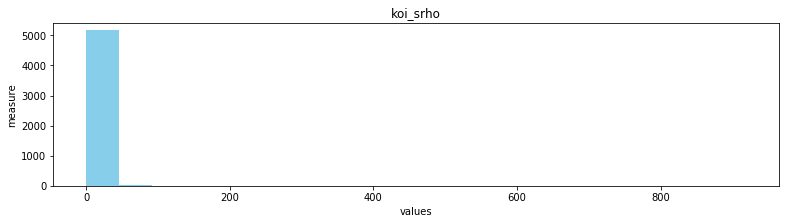

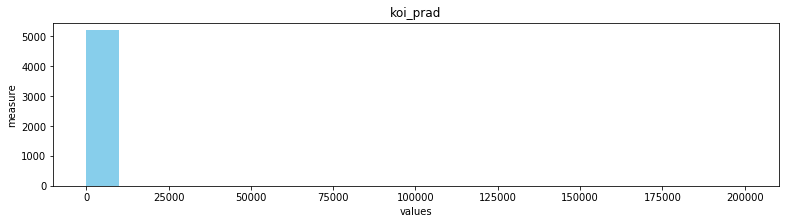

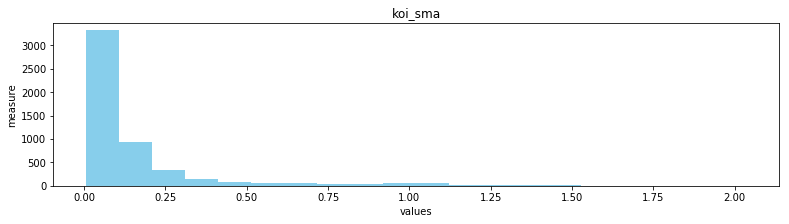

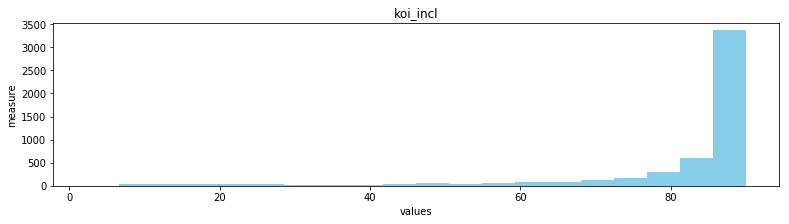

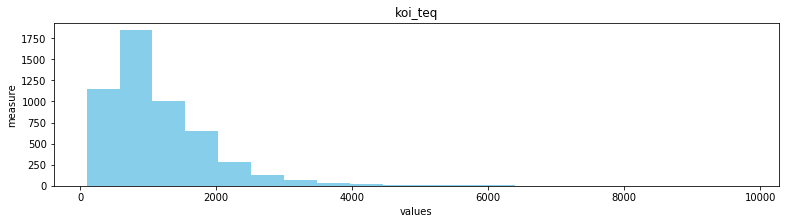

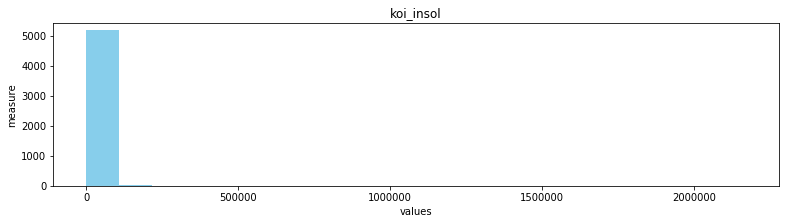

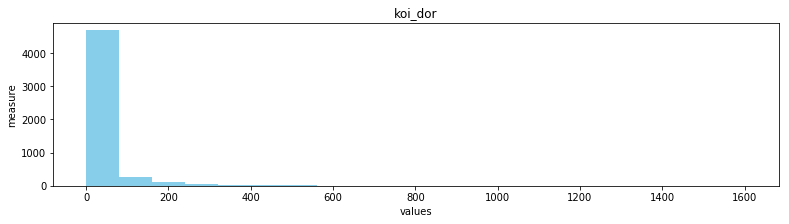

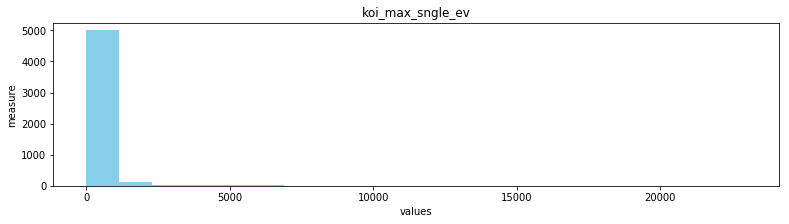

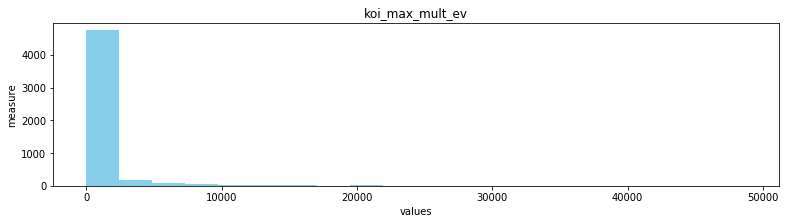

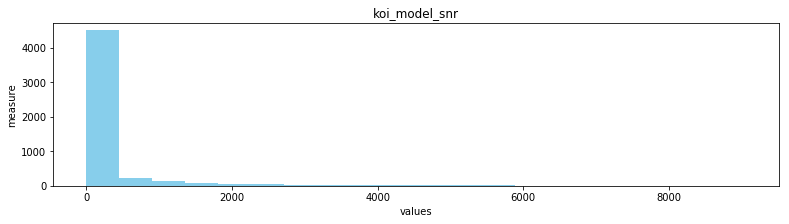

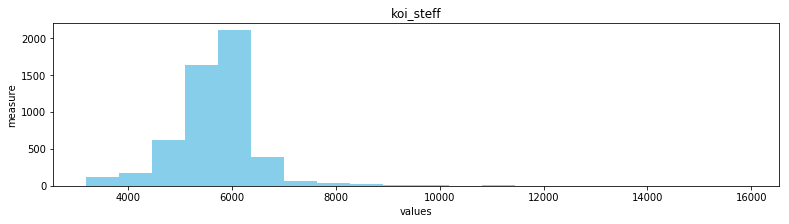

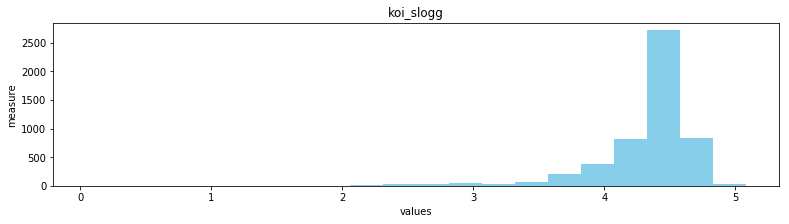

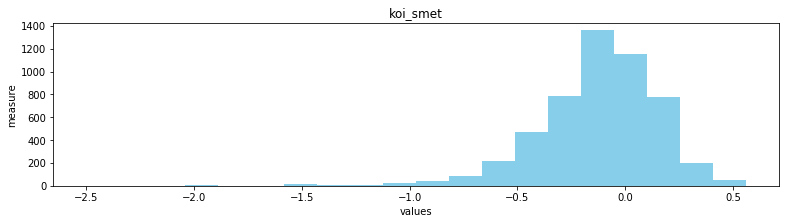

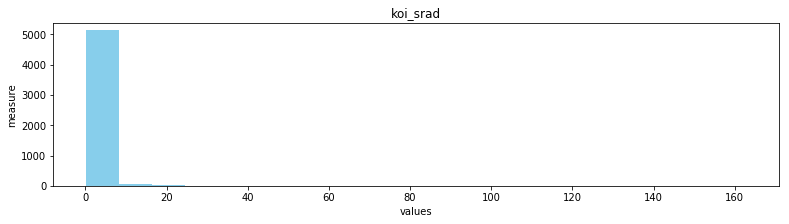

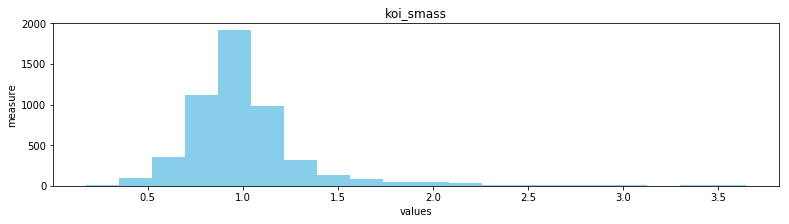

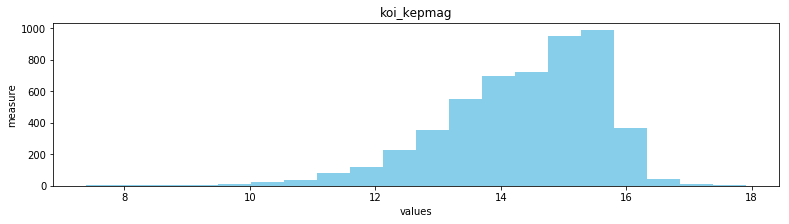

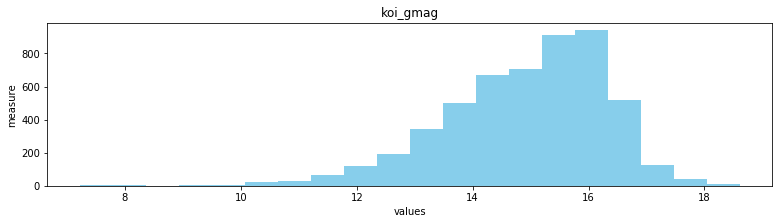

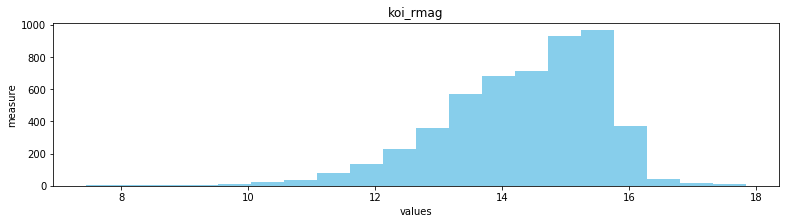

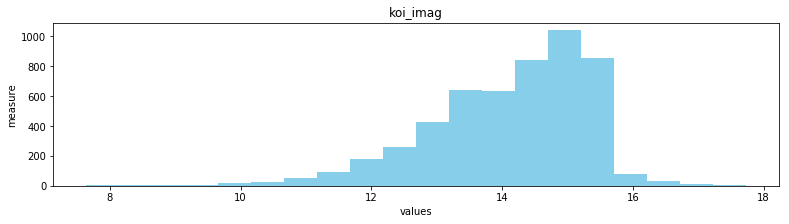

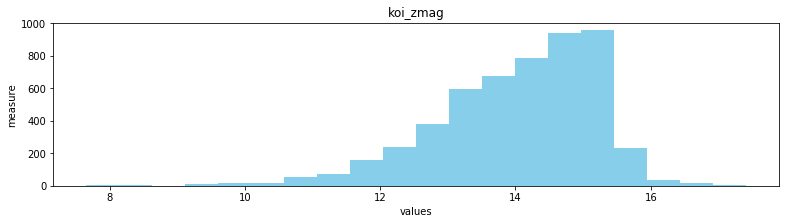

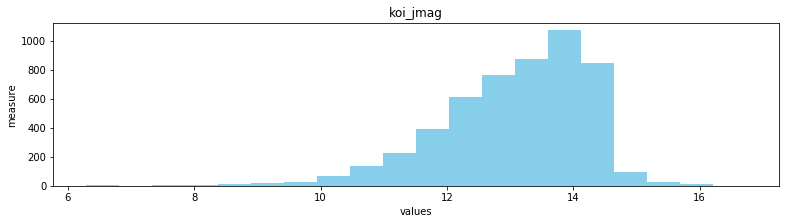

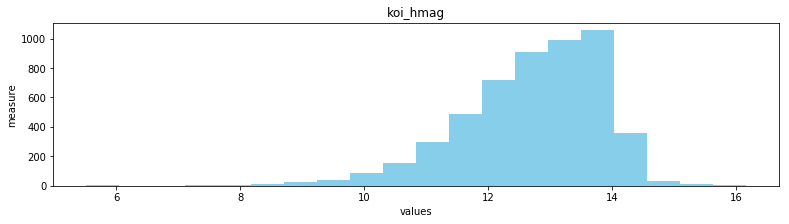

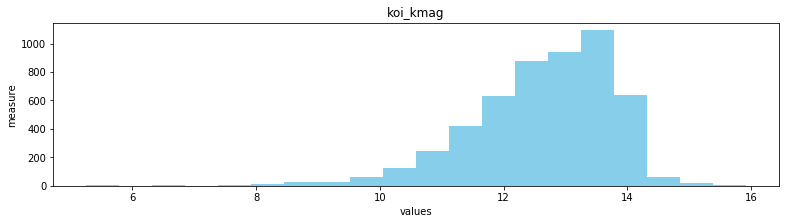

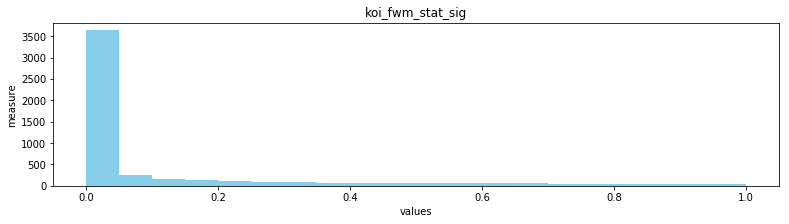

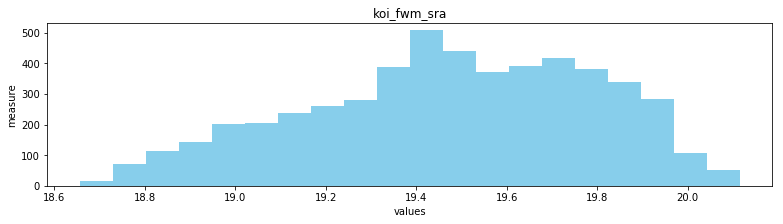

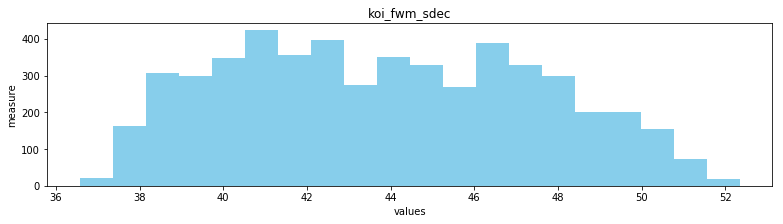

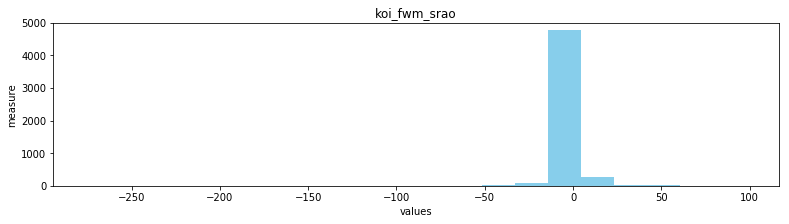

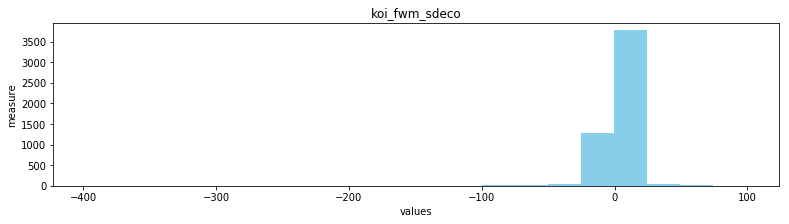

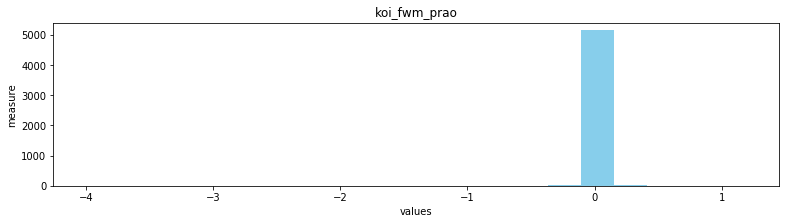

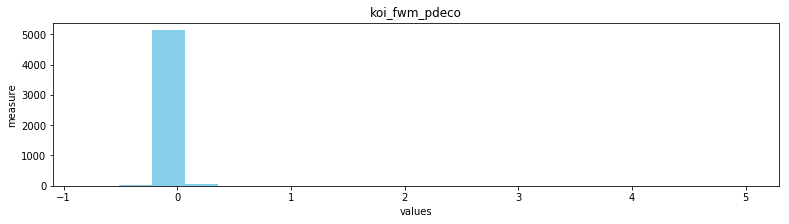

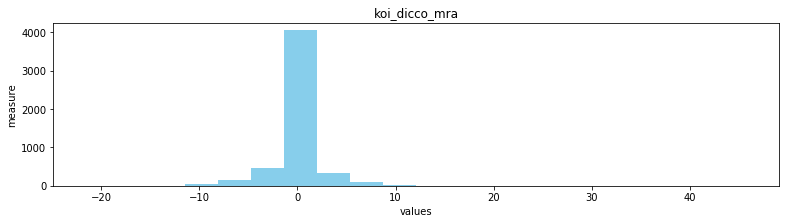

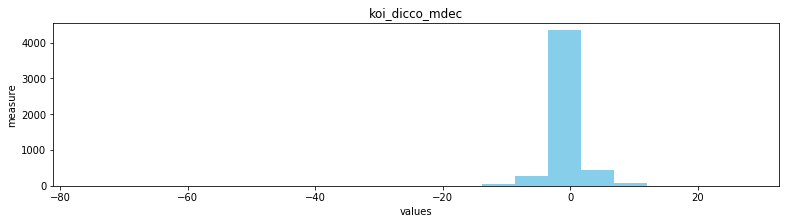

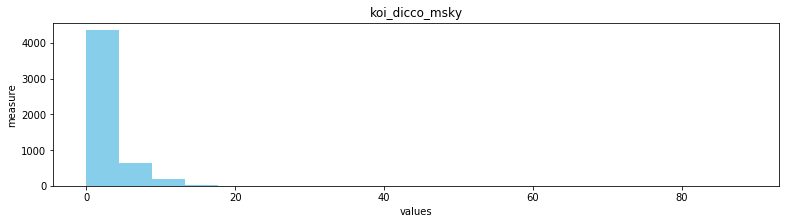

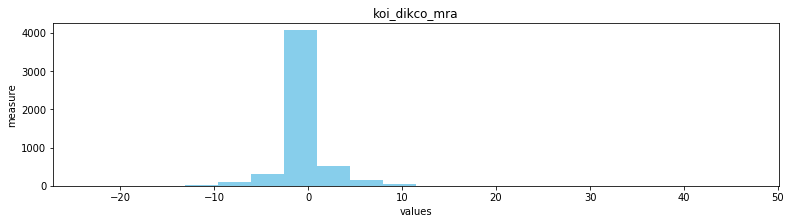

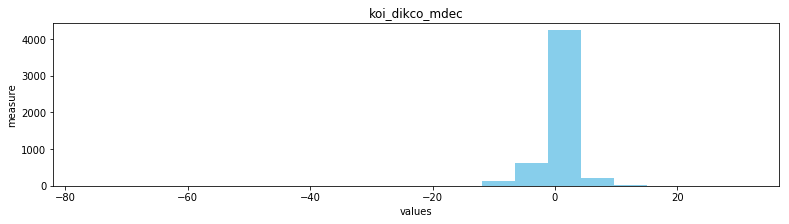

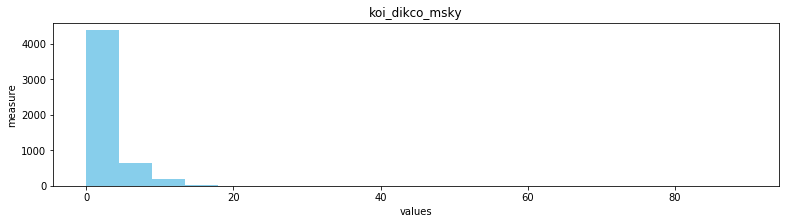

In [55]:
# Numeric datas 
for columns in features:
    plt.figure(figsize=(13, 3))
    plt.hist(df[columns], bins=20, color = "skyblue", lw=0)
    plt.title(columns)
    plt.xlabel("values")
    plt.ylabel("measure")
    plt.show()

In [95]:
#Target ratio
display((df[TARGET].value_counts()/len(df)*100).round(2).to_frame(TARGET +" (%)").T)

,FALSE POSITIVE,CONFIRMED
koi_disposition (%),59.55,40.45


#### Enconding

In [96]:
df[TARGET] = (df[TARGET] == "CONFIRMED").astype(int)
print("Results:")
display(df[[TARGET]].sample(5))

Results:


,koi_disposition
1444,1
3493,0
995,1
3114,0
2252,1


In [97]:
# Enconding Target ratio
y = df[TARGET]
display((y.value_counts()/len(df)*100).round(2).to_frame(TARGET +" (%)").T)

print("\n InputFile:")
with pd.option_context("max_columns", 6):
    display(df.head(5))

,0,1
koi_disposition (%),59.55,40.45



 InputFile:


,koi_disposition,koi_period,koi_impact,...,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,9.48804,0.146,...,0.080,0.310,0.320
1,1,54.41838,0.586,...,0.490,0.120,0.500
2,0,1.73695,1.276,...,-0.257,0.099,0.276
3,1,2.52559,0.701,...,0.070,0.020,0.070
4,0,7.36179,1.169,...,-4.537,7.713,8.948


In [98]:
# Recreates the list of features
features = list(df.columns)
features.remove(TARGET)

#Mean and Standard deviation
df[features] = df[features] - df[features].mean()
df[features] = df[features] / df[features].std()

print("Results:")
df_mean = df[features].mean().round(2).to_frame("Mean")
df_std = df[features].std().round(2).to_frame("Standard deviation")
with pd.option_context("max_rows", 10):
    display(df_mean.join(df_std))
    
df = df.drop(["koi_disposition"], axis=1)
print("\n dataFile:")
with pd.option_context("max_columns", 6):
    display(df.head(5))

Results:


,Mean,Standard deviation
koi_period,-0.0,1.0
koi_impact,-0.0,1.0
koi_duration,0.0,1.0
koi_depth,-0.0,1.0
koi_ror,-0.0,1.0
...,...,...
koi_dicco_mdec,0.0,1.0
koi_dicco_msky,-0.0,1.0
koi_dikco_mra,0.0,1.0
koi_dikco_mdec,0.0,1.0



 dataFile:


,koi_period,koi_impact,koi_duration,...,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,-0.311523,-0.217299,-0.380535,...,0.048032,0.149462,-0.509178
1,0.196636,-0.049884,-0.157990,...,0.214354,0.079985,-0.451904
2,-0.399187,0.212652,-0.459685,...,-0.088677,0.072306,-0.523178
3,-0.390267,-0.006128,-0.567677,...,0.043975,0.043418,-0.588726
4,-0.335570,0.171940,-0.084024,...,-1.824919,2.856491,2.236176


### K-Folds Cross Validation

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    - Take the group as a hold out or test data set
    - Take the remaining groups as a training data set
    - Fit a model on the training set and evaluate it on the test set
    - Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

In [102]:
def crossValidationScores(clf): 
    kfold = KFold(N_FOLDS, True, 1)
    
    mean_train_acc, mean_test_acc = 0, 0
    mean_train_recall, mean_test_recall = 0, 0
    mean_train_f1, mean_test_f1 = 0, 0
    mean_train_prec, mean_test_prec = 0, 0
    
    #train, test, validation
    x_train, y_train = [], []
    x_test, y_test = [], []
    x_val, y_val = [], []
    
    x_predict, y_predict, test_predict_prob = [], [], [] #prediction
    train_acc, test_acc, val_acc = [], [], [] #accuracy
    train_recall, test_recall, val_recall = [], [], [] #recall
    train_f1, test_f1, val_f1 = [], [], [] #f1
    train_prec, test_prec, val_prec = [], [], [] #precision
    
    # enumerate splits
    for train_index, test_index in kfold.split(df):
        x_train, x_test = df.iloc[train_index], df.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #classifier - fit train
        clf = clf.fit(x_train, y_train)
        
        #prediction
        x_predict, y_predict = clf.predict(x_train), clf.predict(x_test) 
        test_predict_prob = clf.predict_proba(x_test)
        
        train_acc.append(accuracy_score(y_train, x_predict))
        test_acc.append(accuracy_score(y_test, y_predict))
        
        train_recall.append(recall_score(y_train, x_predict))
        test_recall.append(recall_score(y_test, y_predict))
        
        train_f1.append(f1_score(y_train, x_predict))
        test_f1.append(f1_score(y_test, y_predict))
        
        train_prec.append(precision_score(y_train, x_predict))
        test_prec.append(precision_score(y_test, y_predict))
        
        mean_train_acc, mean_test_acc = np.mean(train_acc), np.mean(test_acc)
        mean_train_recall, mean_test_recall = np.mean(train_recall), np.mean(test_recall)
        mean_train_f1, mean_test_f1 = np.mean(train_f1), np.mean(test_f1)
        mean_train_prec, mean_test_prec = np.mean(train_prec), np.mean(test_prec)
        
    print("Training:")
    print("\t Accuracy: {:.3}".format(mean_train_acc))
    print("\t Recall: {:.3}".format(mean_train_recall))
    print("\t F1: {:.3}".format(mean_train_f1))
    print("\t Precision: {:.3}".format(mean_train_prec))
    
    print("Test:")
    print("\t Accuracy: {:.3}".format(mean_test_acc))
    print("\t Recall: {:.3}".format(mean_test_recall))
    print("\t F1: {:.3}".format(mean_test_f1))
    print("\t Precision: {:.3}".format(mean_test_prec))

TPR (True Positive Rate) / Recall /Sensitivity

### Naive Bayes

In [105]:
#baseline 
gnb = GaussianNB()
crossValidationScores(gnb)

Training:
	 Accuracy: 0.917
	 Recall: 0.973
	 F1: 0.905
	 Precision: 0.845
Test:
	 Accuracy: 0.918
	 Recall: 0.973
	 F1: 0.905
	 Precision: 0.846


### Decision Tree

In [106]:
dtc = DecisionTreeClassifier()
crossValidationScores(dtc)

Training:
	 Accuracy: 1.0
	 Recall: 1.0
	 F1: 1.0
	 Precision: 1.0
Test:
	 Accuracy: 0.947
	 Recall: 0.94
	 F1: 0.934
	 Precision: 0.928


### Support Vector Machines

In [110]:
kernels = ['linear','sigmoid','poly','rbf']
#svc = SVC(probability=True)

for krn in kernels:
    print (krn)
    svc = SVC(kernel = krn, gamma = 'auto', probability=True)
    crossValidationScores(svc)

linear
Training:
	 Accuracy: 0.955
	 Recall: 0.964
	 F1: 0.946
	 Precision: 0.928
Test:
	 Accuracy: 0.952
	 Recall: 0.96
	 F1: 0.942
	 Precision: 0.924
sigmoid
Training:
	 Accuracy: 0.834
	 Recall: 0.803
	 F1: 0.797
	 Precision: 0.79
Test:
	 Accuracy: 0.834
	 Recall: 0.8
	 F1: 0.796
	 Precision: 0.793
poly
Training:
	 Accuracy: 0.891
	 Recall: 0.983
	 F1: 0.879
	 Precision: 0.795
Test:
	 Accuracy: 0.882
	 Recall: 0.979
	 F1: 0.87
	 Precision: 0.783
rbf
Training:
	 Accuracy: 0.942
	 Recall: 0.961
	 F1: 0.931
	 Precision: 0.902
Test:
	 Accuracy: 0.937
	 Recall: 0.958
	 F1: 0.924
	 Precision: 0.893


### k-Nearest Neighbors

In [111]:
neighbors = [i for i in range(3, 17+1, 2)]
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    crossValidationScores(knn)

Training:
	 Accuracy: 0.935
	 Recall: 0.976
	 F1: 0.924
	 Precision: 0.877
Test:
	 Accuracy: 0.894
	 Recall: 0.96
	 F1: 0.879
	 Precision: 0.812
Training:
	 Accuracy: 0.921
	 Recall: 0.975
	 F1: 0.908
	 Precision: 0.85
Test:
	 Accuracy: 0.894
	 Recall: 0.964
	 F1: 0.88
	 Precision: 0.809
Training:
	 Accuracy: 0.912
	 Recall: 0.975
	 F1: 0.899
	 Precision: 0.834
Test:
	 Accuracy: 0.893
	 Recall: 0.971
	 F1: 0.88
	 Precision: 0.804
Training:
	 Accuracy: 0.905
	 Recall: 0.978
	 F1: 0.893
	 Precision: 0.822
Test:
	 Accuracy: 0.888
	 Recall: 0.972
	 F1: 0.875
	 Precision: 0.795
Training:
	 Accuracy: 0.899
	 Recall: 0.978
	 F1: 0.887
	 Precision: 0.811
Test:
	 Accuracy: 0.886
	 Recall: 0.974
	 F1: 0.874
	 Precision: 0.792
Training:
	 Accuracy: 0.894
	 Recall: 0.977
	 F1: 0.882
	 Precision: 0.804
Test:
	 Accuracy: 0.883
	 Recall: 0.975
	 F1: 0.87
	 Precision: 0.786
Training:
	 Accuracy: 0.89
	 Recall: 0.978
	 F1: 0.878
	 Precision: 0.797
Test:
	 Accuracy: 0.881
	 Recall: 0.973
	 F1: 0.869
	 P

### Random Forest

In [115]:
rf = [i for i in range(1,100+1, 2)]
for n in rf:
    rfc = RandomForestClassifier(n_estimators=n, n_jobs=-1)
    crossValidationScores(rfc)

Training:
	 Accuracy: 0.975
	 Recall: 0.972
	 F1: 0.969
	 Precision: 0.966
Test:
	 Accuracy: 0.934
	 Recall: 0.917
	 F1: 0.918
	 Precision: 0.92
Training:
	 Accuracy: 0.991
	 Recall: 0.987
	 F1: 0.989
	 Precision: 0.991
Test:
	 Accuracy: 0.953
	 Recall: 0.94
	 F1: 0.942
	 Precision: 0.943
Training:
	 Accuracy: 0.994
	 Recall: 0.992
	 F1: 0.993
	 Precision: 0.994
Test:
	 Accuracy: 0.959
	 Recall: 0.945
	 F1: 0.949
	 Precision: 0.953
Training:
	 Accuracy: 0.997
	 Recall: 0.997
	 F1: 0.996
	 Precision: 0.996
Test:
	 Accuracy: 0.962
	 Recall: 0.95
	 F1: 0.952
	 Precision: 0.955
Training:
	 Accuracy: 0.998
	 Recall: 0.997
	 F1: 0.998
	 Precision: 0.998
Test:
	 Accuracy: 0.964
	 Recall: 0.952
	 F1: 0.955
	 Precision: 0.959
Training:
	 Accuracy: 0.998
	 Recall: 0.998
	 F1: 0.998
	 Precision: 0.998
Test:
	 Accuracy: 0.964
	 Recall: 0.948
	 F1: 0.955
	 Precision: 0.962
Training:
	 Accuracy: 0.998
	 Recall: 0.998
	 F1: 0.998
	 Precision: 0.997
Test:
	 Accuracy: 0.964
	 Recall: 0.951
	 F1: 0.955


### Gradient Tree Boosting

In [117]:
gb = [i for i in range(10, 100+1, 10)]
for n_trees in gb:
    gbc = GradientBoostingClassifier(n_estimators = n_trees)
    crossValidationScores(gbc)

Training:
	 Accuracy: 0.958
	 Recall: 0.956
	 F1: 0.948
	 Precision: 0.941
Test:
	 Accuracy: 0.953
	 Recall: 0.945
	 F1: 0.942
	 Precision: 0.94
Training:
	 Accuracy: 0.967
	 Recall: 0.966
	 F1: 0.959
	 Precision: 0.953
Test:
	 Accuracy: 0.96
	 Recall: 0.957
	 F1: 0.951
	 Precision: 0.944
Training:
	 Accuracy: 0.973
	 Recall: 0.974
	 F1: 0.966
	 Precision: 0.958
Test:
	 Accuracy: 0.965
	 Recall: 0.962
	 F1: 0.957
	 Precision: 0.952
Training:
	 Accuracy: 0.976
	 Recall: 0.979
	 F1: 0.971
	 Precision: 0.963
Test:
	 Accuracy: 0.967
	 Recall: 0.965
	 F1: 0.959
	 Precision: 0.953
Training:
	 Accuracy: 0.98
	 Recall: 0.982
	 F1: 0.975
	 Precision: 0.969
Test:
	 Accuracy: 0.969
	 Recall: 0.969
	 F1: 0.962
	 Precision: 0.954
Training:
	 Accuracy: 0.983
	 Recall: 0.985
	 F1: 0.979
	 Precision: 0.973
Test:
	 Accuracy: 0.97
	 Recall: 0.97
	 F1: 0.963
	 Precision: 0.955
Training:
	 Accuracy: 0.985
	 Recall: 0.987
	 F1: 0.981
	 Precision: 0.975
Test:
	 Accuracy: 0.97
	 Recall: 0.971
	 F1: 0.964
	 P

### Results

### Plots